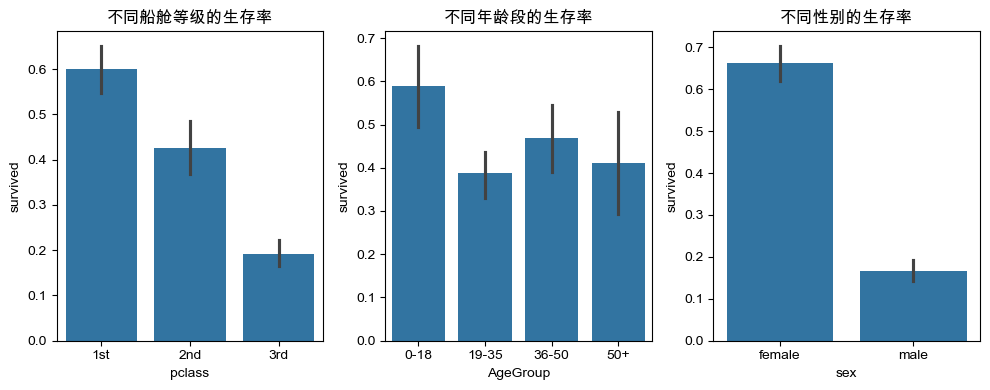


各特征的生存率统计:

船舱等级与生存率:
pclass
1st    0.599379
2nd    0.425000
3rd    0.192686
Name: survived, dtype: float64

年龄段与生存率:
AgeGroup
0-18     0.588785
19-35    0.387417
36-50    0.467949
50+      0.411765
Name: survived, dtype: float64

性别与生存率:
sex
female    0.663067
male      0.167059
Name: survived, dtype: float64


/var/folders/l3/0m_6zqgn08d4z6l_dh0775dw0000gn/T/ipykernel_68109/2465423693.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('AgeGroup')['survived'].mean())


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 读取数据
df = pd.read_csv('./data/titanic.txt')

# 选择需要分析的列
features = ['pclass', 'age', 'sex', 'survived']
data = df[features].copy()
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # Mac系统中文字体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 分析Pclass对生存率的影响
plt.figure(figsize=(10, 4))
plt.subplot(131)
sns.barplot(x='pclass', y='survived', data=data)
plt.title('不同船舱等级的生存率')

# 分析Age对生存率的影响
plt.subplot(132)
# 将年龄分组
data['AgeGroup'] = pd.cut(data['age'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '50+'])
sns.barplot(x='AgeGroup', y='survived', data=data)
plt.title('不同年龄段的生存率')

# 分析Sex对生存率的影响
plt.subplot(133)
sns.barplot(x='sex', y='survived', data=data)
plt.title('不同性别的生存率')

plt.tight_layout()
plt.show()

# 打印各特征的生存率统计
print("\n各特征的生存率统计:")
print("\n船舱等级与生存率:")
print(data.groupby('pclass', observed=False)['survived'].mean())

print("\n年龄段与生存率:")
print(data.groupby('AgeGroup')['survived'].mean())

print("\n性别与生存率:")
print(data.groupby('sex', observed=False)['survived'].mean())








决策树模型评分:
训练集准确率: 0.7886
测试集准确率: 0.7757


/var/folders/l3/0m_6zqgn08d4z6l_dh0775dw0000gn/T/ipykernel_68109/1745042250.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['age'].fillna(X['age'].mean(), inplace=True)


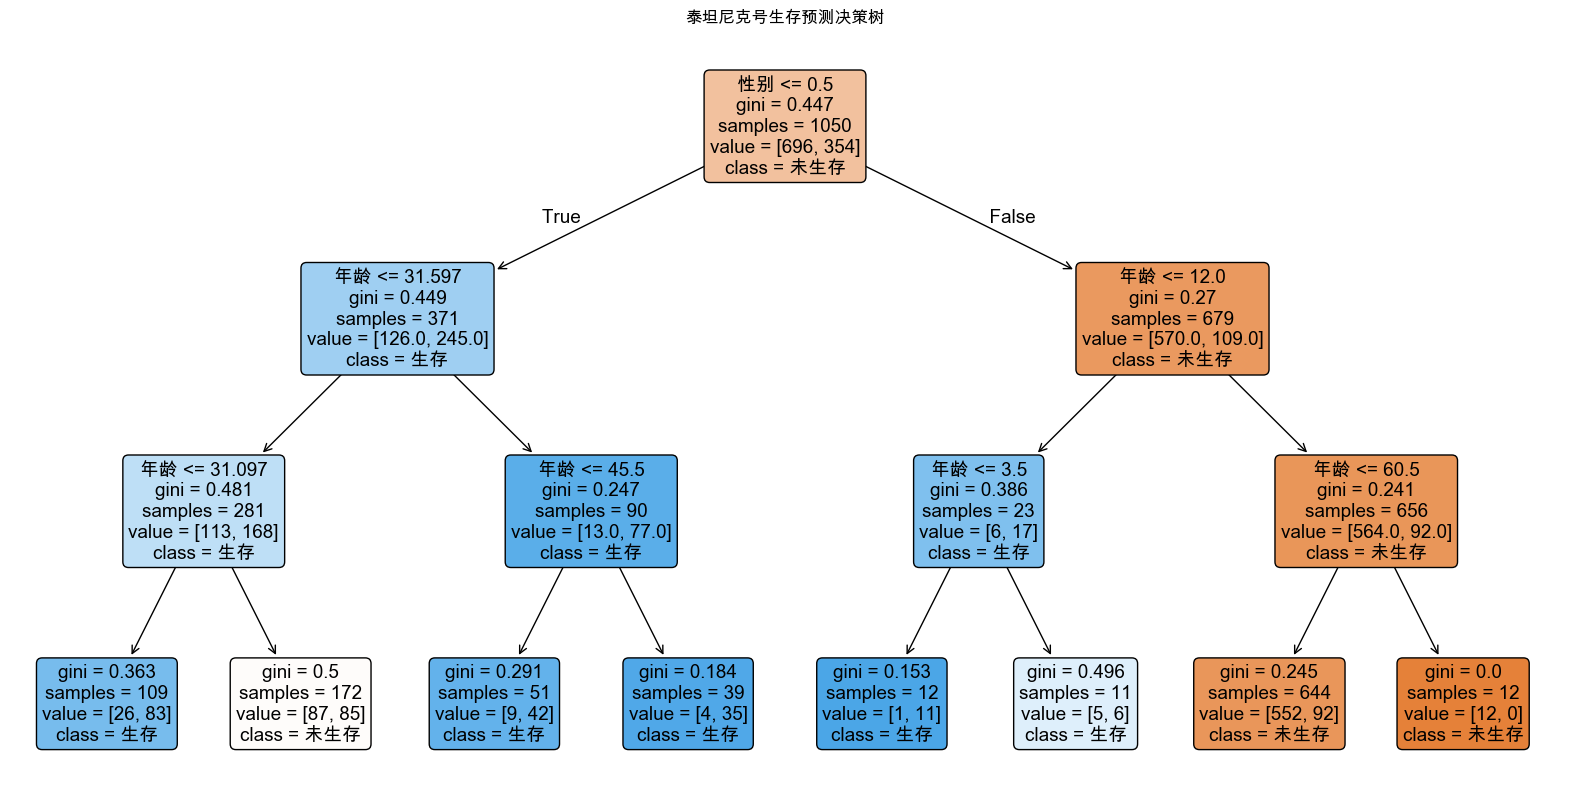


特征重要性:
     特征       重要性
2    性别  0.764987
1    年龄  0.235013
0  船舱等级  0.000000


In [27]:
# 数据预处理

# 将船舱等级转换为数值类型
from decimal import MIN_EMIN


data['pclass'] = data['pclass'].map({'1st': 1, '2nd': 2, '3rd': 3})
# 处理性别特征
le = LabelEncoder()
data['sex_encoded'] = le.fit_transform(data['sex'])

# 准备特征和目标变量
X = data[['pclass', 'age', 'sex_encoded']].copy()
y = data['survived']

# 处理缺失值
X['age'].fillna(X['age'].mean(), inplace=True)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练决策树模型
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)

# 评估模型
train_score = dt_model.score(X_train, y_train)
test_score = dt_model.score(X_test, y_test)

print("\n决策树模型评分:")
print(f"训练集准确率: {train_score:.4f}")
print(f"测试集准确率: {test_score:.4f}")

# 可视化决策树
plt.figure(figsize=(20,10))
plot_tree(dt_model, 
         feature_names=['船舱等级', '年龄', '性别'],
         class_names=['未生存', '生存'],
         filled=True,
         rounded=True)
plt.title("泰坦尼克号生存预测决策树")
plt.show()

# 特征重要性分析
importance = pd.DataFrame({
    '特征': ['船舱等级', '年龄', '性别'],
    '重要性': dt_model.feature_importances_
})
print("\n特征重要性:")
print(importance.sort_values('重要性', ascending=False))

In [36]:
# 导入随机森林分类器
from ensurepip import bootstrap
from sklearn.ensemble import RandomForestClassifier

# 创建随机森林分类器实例
rf_clf = RandomForestClassifier(
    n_estimators=500,  # 决策树的数量
    max_depth=5,    # 树的最大深度
    random_state=42,    # 随机种子，确保结果可复现
    bootstrap=True # 是否使用自助法进行样本采样``
)

# 使用训练数据训练模型
rf_clf.fit(X_train, y_train)

# 在训练集上进行预测
y_train_pred = rf_clf.predict(X_train)

# 在测试集上进行预测
y_test_pred = rf_clf.predict(X_test)

# 计算训练集和测试集的准确率
train_accuracy = rf_clf.score(X_train, y_train)
test_accuracy = rf_clf.score(X_test, y_test)

print(f"训练集准确率: {train_accuracy:.4f}")
print(f"测试集准确率: {test_accuracy:.4f}")


训练集准确率: 0.7952
测试集准确率: 0.7757


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 定义随机森林模型
rf = RandomForestClassifier(random_state=42)

# 定义超参数网格
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# 使用网格搜索进行超参数调优
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# 训练模型
grid_search.fit(X_train, y_train)

# 输出最佳参数和得分
print("最佳参数:", grid_search.best_params_)
print("最佳得分:", grid_search.best_score_)

# 使用最佳参数的模型进行预测
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)


最佳参数: {'max_depth': None, 'n_estimators': 200}
最佳得分: 0.7666666666666666
